# CMSC5702 (Advanced Topics in Parallel / Distributed Systems)
# Assignment 1: Parallel Programming with Sobel Filter


## Objective

Apply the Sobel filter for edge detection on **large square grayscale images** using MPI and OpenMP, and compare the performance of shared-memory vs distributed-memory parallelization. Optionally, include a blurring step to reduce noise before applying the Sobel operator.

This assignment allows you to practice:

* Sequential programming
* OpenMP parallelization on shared-memory systems
* MPI parallelization on distributed-memory systems
* Performance measurement, verification, and speedup analysis

---

## Problem Description

The **Sobel filter** computes approximate image gradients to detect edges. For a grayscale image (I):

$$
G_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix} * I, \quad
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix} * I
$$

The **gradient magnitude** at each pixel is:

$$
G = \sqrt{G_x^2 + G_y^2}
$$
Optional **blurring step**: compute the local average of pixels in a small neighborhood (e.g., 3×3) before applying the Sobel operator to reduce noise.


# Part 1: Sequential Version

- Implement a standard sequential C program to apply the Sobel operator on a grayscale image.
- If including blurring, apply an average filter first (e.g., 3×3 kernel) before Sobel.


#### Question: Explain the algorithm you implemented and if you applyed blurring, explain the blurring method.

#### Your Answer:



In [14]:
!pip install pandas

In [15]:
!pip install matplotlib

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

seq_df = pd.read_csv("sequential_times.csv")

In [17]:
seq_df

,image_size,run1_time,run2_time,run3_time
0,256,0.000933,0.001047,0.000888
1,1024,0.015544,0.014636,0.014826
2,4000,0.210384,0.194488,0.215198
3,16000,4.079864,3.984604,3.932855


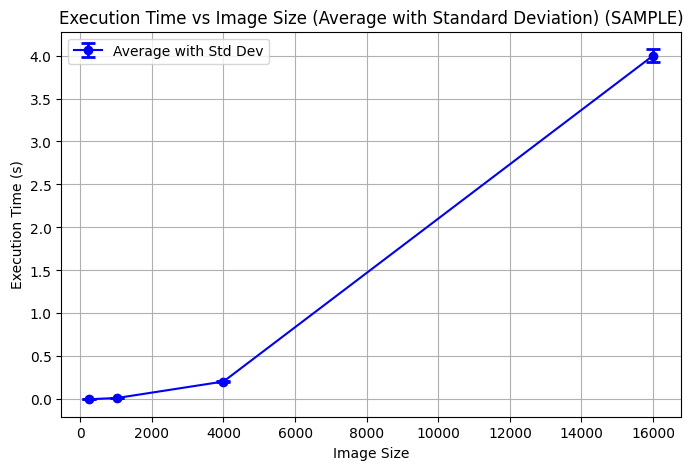

Data with averages and standard deviations:
   image_size  average_time   std_dev
0         256      0.000956  0.000082
1        1024      0.015002  0.000479
2        4000      0.206690  0.010838
3       16000      3.999108  0.074570


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in a DataFrame called df
# Calculate average and standard deviation
seq_df['average_time'] = seq_df[['run1_time', 'run2_time', 'run3_time']].mean(axis=1)
seq_df['std_dev'] = seq_df[['run1_time', 'run2_time', 'run3_time']].std(axis=1)

# Plot with error bars showing standard deviation
plt.figure(figsize=(8,5))
plt.errorbar(seq_df['image_size'], seq_df['average_time'], 
             yerr=seq_df['std_dev'], 
             marker='o', 
             color='blue', 
             label='Average with Std Dev',
             capsize=5,  # Adds caps to the error bars
             capthick=2,
             elinewidth=2)

plt.xlabel('Image Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Image Size (Average with Standard Deviation) (SAMPLE)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print the calculated values
print("Data with averages and standard deviations:")
print(seq_df[['image_size', 'average_time', 'std_dev']])

# Part 2: OpenMP Programming

- Use\#pragma omp parallel for collapse(2) for nested loops.
- Experiment with schedule(static) and other scheduling clauses.
- Process large images in tiles (e.g., 512×512 or 1024×1024) to reduce memory bandwidth issues.
- [Bonus Point] Optionally include a blurring step before the Sobel operator to reduce noise. 


#### Question: Explain the algorithm you implemented and if you applyed blurring, explain the blurring method.

#### Your Answer:



My Answer（TODO:）

In [19]:
omp_df = pd.read_csv("openmp_times.csv")

In [20]:
omp_df.head()

,image_size,threads,run1_time,run2_time,run3_time
0,256,1,0.002602,0.002662,0.002512
1,256,2,0.002633,0.002648,0.002686
2,256,4,0.002697,0.002705,0.002729
3,256,8,0.002934,0.002855,0.002830
4,256,16,0.003115,0.003054,0.003121


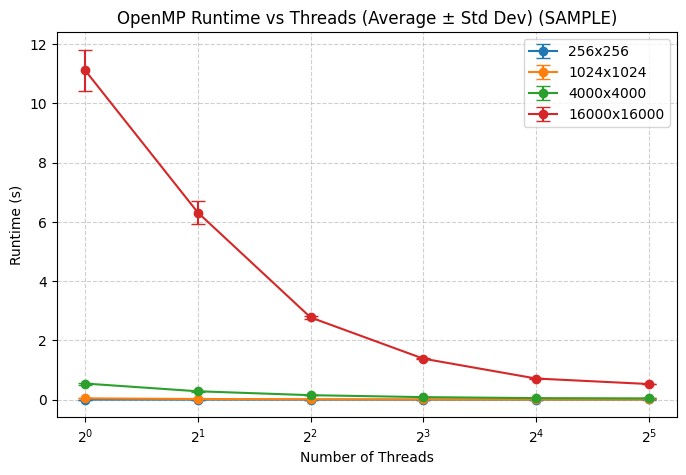

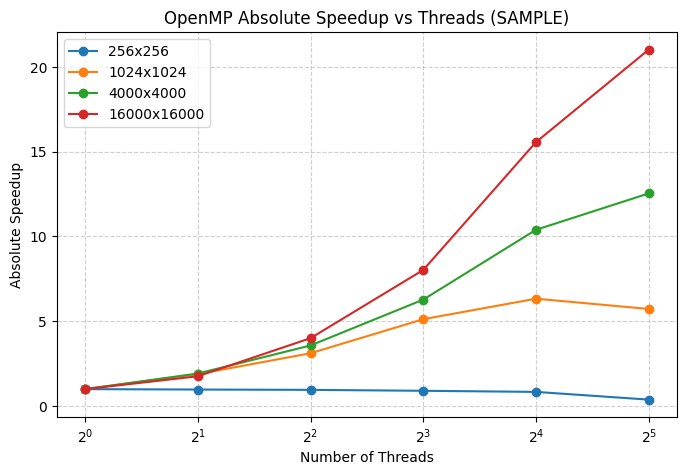

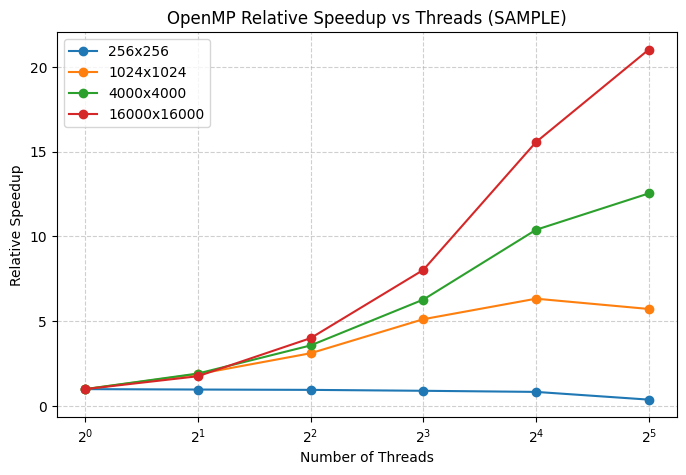

OpenMP data with runtime, std_dev, absolute and relative speedups:
    image_size  threads  average_time   std_dev  absolute_speedup  \
0          256        1      0.002592  0.000075          1.000000   
1          256        2      0.002656  0.000027          0.976026   
2          256        4      0.002710  0.000017          0.956340   
3          256        8      0.002873  0.000054          0.902193   
4          256       16      0.003097  0.000037          0.837029   
5          256       32      0.006793  0.000634          0.381551   
6         1024        1      0.045112  0.001055          1.000000   
7         1024        2      0.023913  0.002435          1.886519   
8         1024        4      0.014483  0.000557          3.114776   
9         1024        8      0.008809  0.000231          5.121358   
10        1024       16      0.007126  0.000275          6.330963   
11        1024       32      0.007880  0.000090          5.724915   
12        4000        1      0.54505

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV if not already loaded
# omp_df = pd.read_csv("openmp_timings.csv")

# 1️⃣ Compute average and standard deviation across runs
omp_df['average_time'] = omp_df[['run1_time','run2_time','run3_time']].mean(axis=1)
omp_df['std_dev'] = omp_df[['run1_time','run2_time','run3_time']].std(axis=1)

# Prepare columns for speedups
omp_df['absolute_speedup'] = 0.0
omp_df['relative_speedup'] = 0.0

# 2️⃣ Compute absolute and relative speedup
# Absolute speedup: vs sequential execution (threads=1)
# Relative speedup: vs OpenMP 1-thread execution (same in this dataset)
for size in omp_df['image_size'].unique():
    # Sequential time (threads=1)
    seq_time = omp_df[(omp_df['image_size']==size) & (omp_df['threads']==1)]['average_time'].values[0]
    
    subset_idx = omp_df[omp_df['image_size']==size].index
    omp_df.loc[subset_idx, 'absolute_speedup'] = seq_time / omp_df.loc[subset_idx, 'average_time']
    omp_df.loc[subset_idx, 'relative_speedup'] = seq_time / omp_df.loc[subset_idx, 'average_time']

# 3️⃣ Plot runtime with error bars
plt.figure(figsize=(8,5))
for size in sorted(omp_df['image_size'].unique()):
    subset = omp_df[omp_df['image_size']==size]
    plt.errorbar(subset['threads'], subset['average_time'], 
                 yerr=subset['std_dev'], 
                 marker='o', label=f'{size}x{size}', capsize=5)

plt.xlabel('Number of Threads')
plt.ylabel('Runtime (s)')
plt.title('OpenMP Runtime vs Threads (Average ± Std Dev) (SAMPLE)')
plt.xscale('log', base=2)
plt.xticks([1,2,4,8,16,32])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 4️⃣ Plot absolute speedup
plt.figure(figsize=(8,5))
for size in sorted(omp_df['image_size'].unique()):
    subset = omp_df[omp_df['image_size']==size]
    plt.plot(subset['threads'], subset['absolute_speedup'], marker='o', label=f'{size}x{size}')

plt.xlabel('Number of Threads')
plt.ylabel('Absolute Speedup')
plt.title('OpenMP Absolute Speedup vs Threads (SAMPLE)')
plt.xscale('log', base=2)
plt.xticks([1,2,4,8,16,32])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 5️⃣ Plot relative speedup (same as absolute here)
plt.figure(figsize=(8,5))
for size in sorted(omp_df['image_size'].unique()):
    subset = omp_df[omp_df['image_size']==size]
    plt.plot(subset['threads'], subset['relative_speedup'], marker='o', label=f'{size}x{size}')

plt.xlabel('Number of Threads')
plt.ylabel('Relative Speedup')
plt.title('OpenMP Relative Speedup vs Threads (SAMPLE)')
plt.xscale('log', base=2)
plt.xticks([1,2,4,8,16,32])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 6️⃣ Optional: Print the full dataframe
print("OpenMP data with runtime, std_dev, absolute and relative speedups:")
print(omp_df[['image_size','threads','average_time','std_dev','absolute_speedup','relative_speedup']])


# # Part 3: MPI Programming

- Choose a domain decomposition strategy, such as row-wise decomposition, column-wise decomposition, etc., decomposition. Your choice will affect performance, and better-designed decomposition and communication patterns will receive higher marks.
- For each process, you may need to include some approaches to allow seamless computation for the edges.
- [Bonus Point] You can include If a parallelized blurring step and you may need to try to optimize the communications.
- Verify your implementation using small test patterns (5×5 or 10×10) and visually inspect sample images for correctness.


In [22]:
mpi_df = pd.read_csv("mpi_times.csv")

In [23]:
mpi_df.head()

,image_size,nodes,processes,run1_time,run2_time,run3_time
0,256,1,1,0.004858,0.004847,0.004859
1,256,1,2,0.004317,0.004334,0.004342
2,256,1,4,0.002223,0.002965,0.002210
3,256,4,8,0.010011,0.009881,0.010153
4,256,4,16,0.010022,0.009914,0.010408


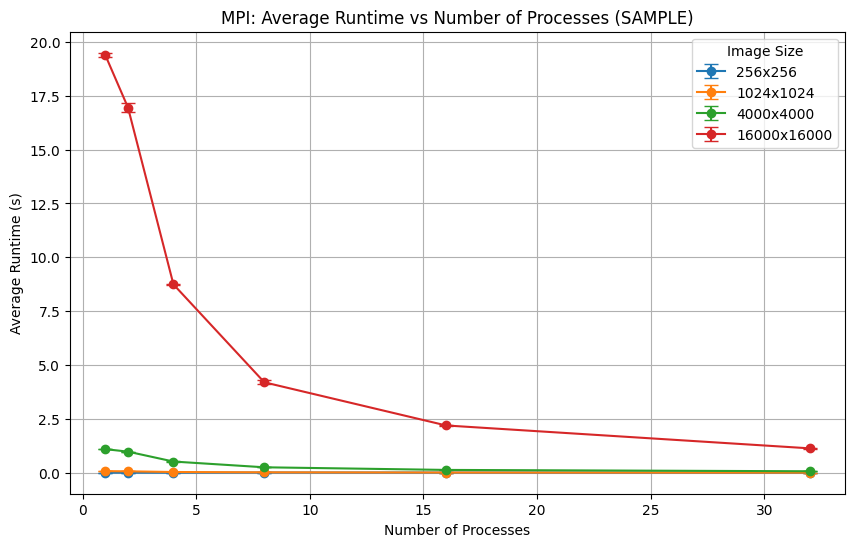

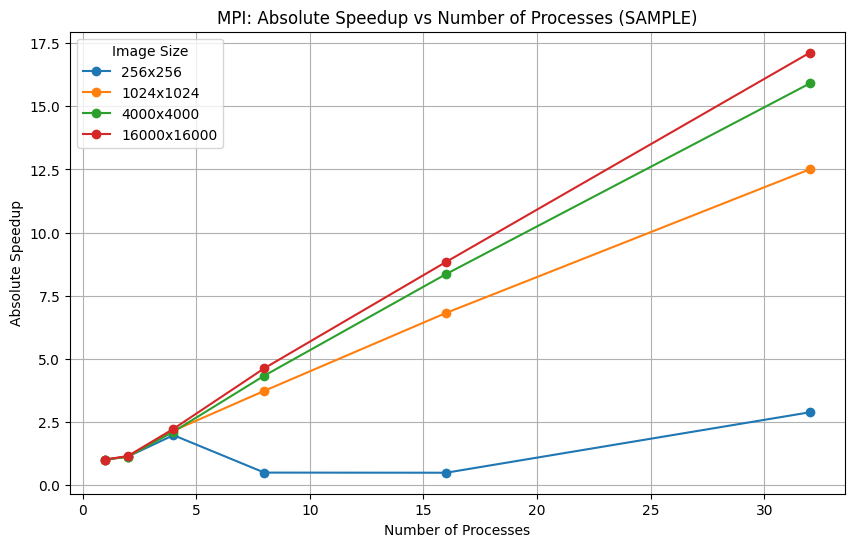

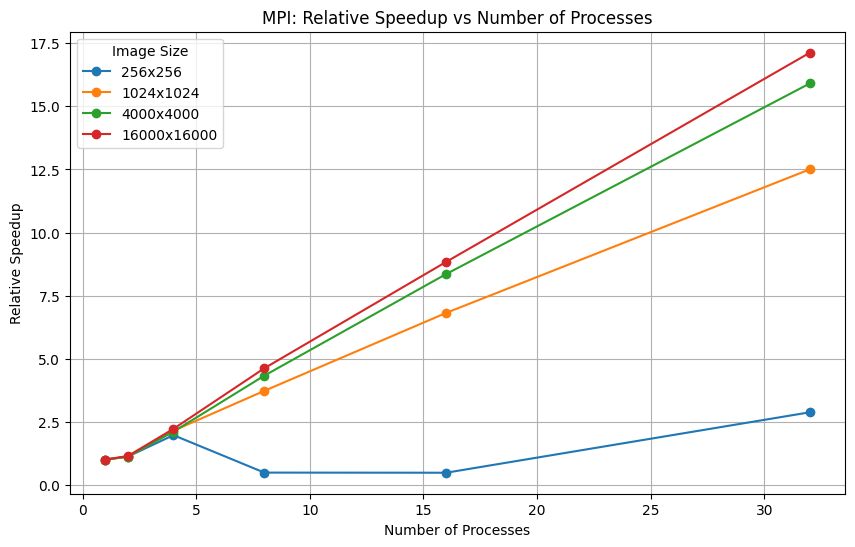

    image_size  nodes  processes  average_time   std_dev  absolute_speedup  \
0          256      1          1      0.004855  0.000007          1.000000   
1          256      1          2      0.004331  0.000013          1.120911   
2          256      1          4      0.002466  0.000432          1.968640   
3          256      4          8      0.010015  0.000136          0.484740   
4          256      4         16      0.010115  0.000260          0.479963   
5          256      4         32      0.001689  0.000492          2.874852   
6         1024      1          1      0.073846  0.001352          1.000000   
7         1024      1          2      0.066292  0.001806          1.113961   
8         1024      1          4      0.034436  0.000432          2.144431   
9         1024      4          8      0.019822  0.000114          3.725473   
10        1024      4         16      0.010837  0.000087          6.814069   
11        1024      4         32      0.005906  0.000102        

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Compute average and standard deviation of runtime
mpi_df['average_time'] = mpi_df[['run1_time', 'run2_time', 'run3_time']].mean(axis=1)
mpi_df['std_dev'] = mpi_df[['run1_time', 'run2_time', 'run3_time']].std(axis=1)

# --- Compute Absolute and Relative Speedup from CSV ---

# Absolute speedup: sequential = 1 process on 1 node
absolute_speedup = {}
for img_size in mpi_df['image_size'].unique():
    # Find sequential runtime: 1 node, 1 process
    seq_time = mpi_df[(mpi_df['image_size']==img_size) & 
                      (mpi_df['nodes']==1) & 
                      (mpi_df['processes']==1)]['average_time'].values[0]
    absolute_speedup[img_size] = seq_time

# Add speedup columns
mpi_df['absolute_speedup'] = mpi_df.apply(lambda row: absolute_speedup[row['image_size']] / row['average_time'], axis=1)

# Relative speedup: 1 process on 1 node runtime as reference
relative_speedup = {}
for img_size in mpi_df['image_size'].unique():
    ref_time = mpi_df[(mpi_df['image_size']==img_size) & 
                      (mpi_df['nodes']==1) & 
                      (mpi_df['processes']==1)]['average_time'].values[0]
    relative_speedup[img_size] = ref_time

mpi_df['relative_speedup'] = mpi_df.apply(lambda row: relative_speedup[row['image_size']] / row['average_time'], axis=1)

# --- Plots ---

# Runtime with error bars
plt.figure(figsize=(10,6))
for img_size in sorted(mpi_df['image_size'].unique()):
    df_img = mpi_df[mpi_df['image_size']==img_size]
    plt.errorbar(df_img['processes'], df_img['average_time'], yerr=df_img['std_dev'],
                 marker='o', capsize=5, label=f'{img_size}x{img_size}')
plt.xlabel('Number of Processes')
plt.ylabel('Average Runtime (s)')
plt.title('MPI: Average Runtime vs Number of Processes (SAMPLE)')
plt.legend(title='Image Size')
plt.grid(True)
plt.show()

# Absolute speedup
plt.figure(figsize=(10,6))
for img_size in sorted(mpi_df['image_size'].unique()):
    df_img = mpi_df[mpi_df['image_size']==img_size]
    plt.plot(df_img['processes'], df_img['absolute_speedup'], marker='o', label=f'{img_size}x{img_size}')
plt.xlabel('Number of Processes')
plt.ylabel('Absolute Speedup')
plt.title('MPI: Absolute Speedup vs Number of Processes (SAMPLE)')
plt.legend(title='Image Size')
plt.grid(True)
plt.show()

# Relative speedup
plt.figure(figsize=(10,6))
for img_size in sorted(mpi_df['image_size'].unique()):
    df_img = mpi_df[mpi_df['image_size']==img_size]
    plt.plot(df_img['processes'], df_img['relative_speedup'], marker='o', label=f'{img_size}x{img_size}')
plt.xlabel('Number of Processes')
plt.ylabel('Relative Speedup')
plt.title('MPI: Relative Speedup vs Number of Processes')
plt.legend(title='Image Size')
plt.grid(True)
plt.show()

# Optional: print dataframe
print(mpi_df[['image_size','nodes','processes','average_time','std_dev','absolute_speedup','relative_speedup']])
